In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

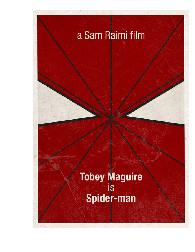

In [2]:
image = cv2.imread('./pictures/spider-man.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.axis("off")
plt.imshow(image)

In [3]:
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [4]:
clt = KMeans(n_clusters=3)
clt.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
def centroid_histogram(clt):
    n_labels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    hist, _ = np.histogram(clt.labels_, bins=n_labels)
    
    hist = hist.astype("float")
    hist /= hist.sum()
    
    return hist


def plot_colors(hist, centroids):
    width, height = 300, 50
    bar = np.zeros((height, width, 3), dtype = "uint8")
    startX = 0
 
    for percent, color in zip(hist, centroids):
        endX = startX + (percent * width)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), height), color.astype("uint8").tolist(), -1)
        startX = endX

    return bar

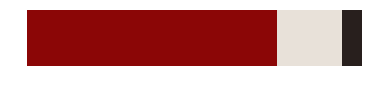

In [6]:
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)

plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()